# Odor Meso
The following notebook is an example for one animal, session, and scan.

In [1]:
%matplotlib inline

import numpy as np
import h5py
from matplotlib import pyplot, animation
from matplotlib_scalebar.scalebar import ScaleBar
from IPython.display import HTML
from tqdm import tqdm
from scipy.ndimage import gaussian_filter
from scipy.interpolate import griddata
import datajoint as dj
import scanreader

from pipeline import meso, experiment, odor, mice, treadmill
from data_plot import data_plot

dj.__version__

Loading local settings from pipeline_config.json
Connecting kabilar@at-database.ad.bcm.edu:3306
DataJoint Module Installed =  True


'0.12.8'

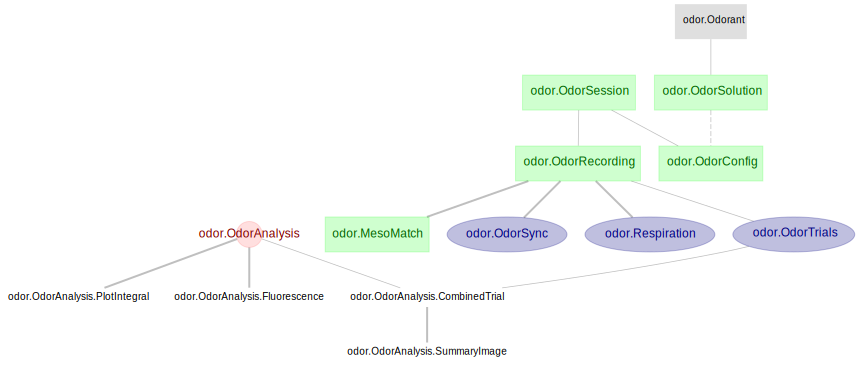

In [2]:
dj.Diagram(odor) #+ dj.Diagram(mice) + dj.Diagram(experiment) + dj.Diagram(meso)

# Query ingested data

In [4]:
experiment.ExperimentalIdentifier()

experiment_id,animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file
1,1571,1,1


In [3]:
odor.OdorAnalysis.CombinedTrial()

experiment_id,animal_id id number,odor_session session index for the mouse,recording_idx recording index for session,trial_idx trial index for recording,channel channel number used,trial_start_time,trial_end_time,odorant,nozzles,duration,start,stop,common,pre_stim,odor_post,pre_maxodor_post,pre_odor_post,odor,maxodor_post,problems
1,1571,10,0,0,10,28.854,29.865,Eugenol_0.01,=BLOB=,14,370,384,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,2,8,34.94,37.976,1-Butanol_0.01,=BLOB=,40,448,488,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,8,11,43.051,43.554,1-Hexanol_0.01,=BLOB=,7,553,560,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,9,8,48.632,53.698,1-Butanol_0.01,=BLOB=,66,624,690,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,19,5,58.772,63.838,Acetophenone_0.01,=BLOB=,66,754,820,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,29,8,68.913,69.925,1-Butanol_0.01,=BLOB=,14,885,899,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,31,6,74.995,80.069,Eucalyptol_0.01,=BLOB=,66,963,1029,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,41,1,85.148,86.159,Empty_0.00,=BLOB=,14,1093,1107,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,43,8,91.239,94.277,1-Butanol_0.01,=BLOB=,40,1171,1211,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,49,12,99.356,99.861,rCarvone_0.01,=BLOB=,7,1276,1283,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,


In [4]:
odor.OdorAnalysis.CombinedTrial & 'odorant="Acetophenone_0.01"'

experiment_id,animal_id id number,odor_session session index for the mouse,recording_idx recording index for session,trial_idx trial index for recording,channel channel number used,trial_start_time,trial_end_time,odorant,nozzles,duration,start,stop,common,pre_stim,odor_post,pre_maxodor_post,pre_odor_post,odor,maxodor_post,problems
1,1571,10,0,19,5,58.772,63.838,Acetophenone_0.01,=BLOB=,66,754,820,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,121,5,222.071,223.081,Acetophenone_0.01,=BLOB=,14,2851,2865,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,185,5,305.251,305.755,Acetophenone_0.01,=BLOB=,7,3919,3926,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,292,5,466.018,471.082,Acetophenone_0.01,=BLOB=,66,5983,6049,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,319,5,520.269,525.334,Acetophenone_0.01,=BLOB=,66,6679,6745,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,390,5,622.684,623.693,Acetophenone_0.01,=BLOB=,14,7994,8008,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,394,5,634.855,635.359,Acetophenone_0.01,=BLOB=,7,8150,8157,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,425,5,691.142,696.208,Acetophenone_0.01,=BLOB=,66,8872,8938,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,455,5,733.225,733.728,Acetophenone_0.01,=BLOB=,7,9413,9420,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
1,1571,10,0,514,5,803.712,804.216,Acetophenone_0.01,=BLOB=,8,10317,10325,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=,


In [5]:
odor.OdorAnalysis.Fluorescence()

experiment_id,raw_fluorescence,f0s,f0_method,df_fs
1,=BLOB=,=BLOB=,combo,=BLOB=


# Define plotting functions

In [6]:
def plot_masks(field, segmentation_method, mask_pixels, mask_weights, 
               threshold_fraction, image_size, axis, mask_sig):

    for i in tqdm(range(0, np.shape(mask_pixels)[0])):
        mask_pixels_threshold = np.delete(mask_pixels[i], 
                                          np.where(mask_weights[i] < weight_threshold))

        mask_pixels_unravel = np.unravel_index(np.ndarray.astype(mask_pixels_threshold,'int64'), image_size, order='F')
        mask_image = np.zeros(image_size, dtype=np.bool)
        mask_image[mask_pixels_unravel] = True

        if (mask_sig is not None) and (i in mask_sig[field-1]):
            axis.contour(mask_image, colors='red', linewidths=0.5)
        else:
            axis.contour(mask_image, colors='white', linewidths=0.5)

In [7]:
def plot_masks_stitch(segmentation_method, threshold_fraction, axis, mask_sig):

#     print('Weight min:       ', weight_min)
#     print('Weight max:       ', weight_max)
#     print('Weight threshold: ', weight_threshold)

    # Move masks to stitched image space
    key = {'animal_id': 1571, 'session': 1, 'scan_idx': 1, 'pipeline_version': 1}
#         all_heights = (meso.ScanInfo.Field & key).fetch('px_height')
#         all_widths = (meso.ScanInfo.Field & key).fetch('px_width')
#         length_total = sum(np.multiply(all_heights, all_widths))
#         all_coordinates = np.empty((length_total, 2))
#         all_values = np.empty((length_total))
#         counter = 0

    for field in [1,2,3]:
        scan_field = (meso.ScanInfo.Field & key & f'field={field}').fetch1()
        image_size = [scan_field['px_height'], scan_field['px_width']]

        um_per_px_width = scan_field['um_width'] / scan_field['px_width']
        um_per_px_height = scan_field['um_height'] / scan_field['px_height']

        mask_pixels, mask_weights = (meso.Segmentation.Mask 
                                     & f'field={field}' 
                                     & f'segmentation_method={segmentation_method}'
                                    ).fetch('pixels', 'weights')

        # Calculate mask weights threshold
        weight_min=1
        weight_max=0
        for i in range(0, np.shape(mask_weights)[0]):
            if np.min(mask_weights[i]) < weight_min:
                weight_min = np.min(mask_weights[i])

            if np.max(mask_weights[i]) > weight_max:
                weight_max = np.max(mask_weights[i])

        weight_threshold = threshold_fraction * (weight_max-weight_min) + weight_min

#             mask_image = np.zeros(image_size, dtype=int)

        # Plot each mask
        for i in tqdm(range(0, np.shape(mask_pixels)[0])):
            mask_threshold = np.delete(mask_pixels[i], np.where(mask_weights[i] < weight_threshold))
            mask_unravel = np.unravel_index(np.ndarray.astype(mask_threshold,'int64'), image_size, order='F')
#                 mask_image[mask_pixels_unravel] = 1

    #     x = um_per_px_width*(np.array(range(scan_field['px_width'])) - scan_field['px_width']/2)
    #     y = um_per_px_height*(np.array(range(scan_field['px_height'])) - scan_field['px_height']/2)

        # Motion correct
    #     x_shifted = np.repeat(x[...,np.newaxis], frame+1-frame, axis=1) + x_shifts[frame:frame+1]
    #     y_shifted = np.repeat(y[...,np.newaxis], frame+1-frame, axis=1) + y_shifts[frame:frame+1]

            mask_transform = np.empty((len(mask_threshold), 2))
            mask_values = np.ones(len(mask_threshold))
#             print(np.shape(mask_transform),np.shape(mask_values))
            # Stitch masks
#             for j in range(len(mask_threshold)):
            mask_transform[:,0] = um_per_px_width*(mask_unravel[1][:]  - (scan_field['px_width']/2)) + scan_field['x']
            mask_transform[:,1] = um_per_px_height*(mask_unravel[0][:] - (scan_field['px_height']/2)) + scan_field['y']
#             print(i, mask_unravel, mask_transform)
#                 print(i, mask_unravel[0][i], mask_unravel[1][i], mask_transform[i,0], mask_transform[i,1])

#                 all_coordinates = np.empty((len(mask_pixels_threshold), 2))
#                 all_values = np.empty((len(mask_pixels_threshold)))
#                 counter = 0

#                 for i in range(scan_field['px_width']):
#                     for j in range(scan_field['px_height']):
#                         all_coordinates[counter,0] = um_per_px_width*(i - (scan_field['px_width']/2)) + scan_field['x']
#                         all_coordinates[counter,1] = um_per_px_height*(j - (scan_field['px_height']/2)) + scan_field['y']
#                         all_values[counter] = mask_image[j, i]*1

#                         counter+=1

            # Interpolate fields onto a uniform grid
            width_min = 108.12#np.min(all_coordinates[:,0]) #108.12
            width_max = 1903.12#np.max(all_coordinates[:,0]) #3108.12
            height_min = -1070.208#np.min(all_coordinates[:,1]) #-1070.208
            height_max = 1725.1253333333334#np.max(all_coordinates[:,1]) #1729.792
#             print(width_min,width_max,height_min,height_max)
#             print(np.min(mask_transform[:,0]),
#                   np.max(mask_transform[:,0]),
#                   np.min(mask_transform[:,1]),
#                   np.max(mask_transform[:,1]))

            grid_x, grid_y = np.mgrid[height_min:height_max:560j, 
                                      width_min:width_max:360j]

            mask_image = griddata(mask_transform, mask_values, (grid_y, grid_x), method='nearest')

#             print(np.shape(np.where(mask_image==1)))
#                 mask_image = griddata(all_coordinates, all_values, (grid_y, grid_x), method='nearest')
#             print(mask_image)
            axis.contour(mask_image, colors='white', linewidths=0.5)
#         mask_image_threshold = np.ma.masked_where(mask_image < 1, mask_image)
#         axis.imshow(mask_image_threshold, aspect="equal", interpolation='none', alpha=0.5)

In [8]:
# # Determine complete image extent
# for field in [1,2,3]:
#     scan_field = (meso.ScanInfo.Field & key & f'field={field}').fetch1()
#     um_per_px_width = scan_field['um_width'] / scan_field['px_width']
#     um_per_px_height = scan_field['um_height'] / scan_field['px_height']

#     width_min = um_per_px_width*(0 - scan_field['px_width']/2) + scan_field['x']
#     width_max = um_per_px_width*(360 - scan_field['px_width']/2) + scan_field['x']
#     height_min = um_per_px_height*(0 - scan_field['px_height']/2) + scan_field['y']
#     height_max = um_per_px_height*(560 - scan_field['px_height']/2) + scan_field['y']
#     print('Complete image coordinates: ', width_min, width_max, height_min, height_max)
    
# Complete image coordinates:  708.12 2508.12 -1070.208 1729.792
# Complete image coordinates:  108.12 1908.12 -1070.208 1543.1253333333334 # why is this different?
# Complete image coordinates:  1308.12 3108.12 -1070.208 1729.792

In [9]:
def plot_fields_movie(fields, fps, vmin=1, vmax=1, masks=False, segmentation_method=1, threshold_fraction=0.1, mask_sig=None):
    figure, axes = pyplot.subplots(1, 3, figsize=(8,8))
    figure.patch.set_facecolor('xkcd:black')

    # Create placeholder
    axes[0].set_title('Field 2', color='white')
    axes[1].set_title('Field 1', color='white')
    axes[2].set_title('Field 3', color='white')

    axes[0].axis('off')
    axes[1].axis('off')
    axes[2].axis('off')

    print('Image min intensity: ', fields[0].min())
    print('Image max intensity: ', fields[0].max())
    
    im1 = axes[0].imshow(fields[1][:, :, 0], vmin=fields[0].min()*vmin, vmax=fields[0].max()*vmax, aspect="equal")
    im0 = axes[1].imshow(fields[0][:, :, 0], vmin=fields[0].min()*vmin, vmax=fields[0].max()*vmax, aspect="equal")
    im2 = axes[2].imshow(fields[2][:, :, 0], vmin=fields[0].min()*vmin, vmax=fields[0].max()*vmax, aspect="equal")

    pyplot.close()

    def animate(i):
        im1.set_data(fields[1][:, :, i])
        im0.set_data(fields[0][:, :, i])
        im2.set_data(fields[2][:, :, i])

    video = animation.FuncAnimation(fig = figure, 
                                    func = animate, 
                                    frames = fields[0].shape[2], 
                                    interval = 1000 / fps)

    if masks:
        axes_reordered = [1,0,2]
        
        for field in [1,2,3]:
            axis = axes_reordered[field-1]

            mask_pixels, mask_weights = (meso.Segmentation.Mask & f'field={field}' & f'segmentation_method={segmentation_method}').fetch('pixels', 'weights')
            plot_masks(field = field,
                       segmentation_method = segmentation_method,
                       mask_pixels = mask_pixels, 
                       mask_weights = mask_weights, 
                       threshold_fraction = threshold_fraction, 
                       image_size = np.shape(fields[field-1])[0:2], 
                       axis = axes[axis], 
                       mask_sig = mask_sig)

    return HTML(video.to_html5_video(embed_limit=100))

In [1]:
plot_stitched_movie(image = stitched_image_filter, 
                    fps = fps, 
                    vmin = 1.1, 
                    vmax = 0.75, 
                    masks = True, 
                    segmentation_method = 1, 
                    threshold_fraction = 0.1)

In [10]:
def plot_stitched_movie(image, fps, vmin=1, vmax=1, masks=False, segmentation_method=1, threshold_fraction=0.1):
    figure = pyplot.figure(figsize=(8,8))
    
    print('Image min intensity: ', np.nanmin(image))
    print('Image max intensity: ', np.nanmax(image))
    
    im1 = pyplot.imshow(image[:, :, 0], 
                        vmin=np.nanmin(image)*vmin, 
                        vmax=np.nanmax(image)*vmax, 
                        aspect="equal")

    figure.patch.set_facecolor('xkcd:black')
    axis = figure.axes[0]
    axis.tick_params(axis='both', colors='white')

    pyplot.close()

    def animate(i):
        im1.set_data(image[:, :, i])

    video = animation.FuncAnimation(fig = figure, 
                                    func = animate, 
                                    frames = image.shape[2], 
                                    interval = 1000 / fps)

    if masks:
#         for field in [1]:
#             mask_pixels, mask_weights = (meso.Segmentation.Mask & f'field={field}' & f'segmentation_method={segmentation_method}').fetch('pixels', 'weights')
        plot_masks_stitch(segmentation_method = segmentation_method,
                          threshold_fraction = threshold_fraction, 
#                           image_size = image.shape[0:2], 
                          axis = axis, 
                          mask_sig = None)
    
    scalebar = ScaleBar(dx=5, units='mm', dimension='si-length', length_fraction=0.111, color='w', box_alpha=0, location='lower right')
    axis.add_artist(scalebar)

    return HTML(video.to_html5_video(embed_limit=100))

# Plot original scans

In [13]:
experiment_id = 1
experiment_id_query = experiment.ExperimentalIdentifier() & f'experiment_id={experiment_id}'
experiment_id_query

experiment_id,animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file
1,1571,1,1


In [15]:
# Load ScanImage TIFF
scan_filename = (experiment.Scan() & experiment_id_query).local_filenames_as_wildcard
scan = scanreader.read_scan(scan_filename)#each session receives a new name - experiment.Session
frame_stop = scan.num_frames
fps = (meso.ScanInfo & key).fetch1('fps')

/data/external/meso_storage/1571_1_00001*.tif


In [16]:
# Fetch frames for one trial_idx
key = {'experiment_id': 1, 'trial_idx': 19}
start, stop = (odor.OdorAnalysis.CombinedTrial & key).fetch1('start','stop')
print(start,stop)
# scan [field_id, y, x, channel, frames]
channel = 1
scan_f0 = scan[0, :, :, channel - 1, start:stop]
scan_f1 = scan[1, :, :, channel - 1, start:stop]
scan_f2 = scan[2, :, :, channel - 1, start:stop]

754 820


In [25]:
fields=[scan_f0, scan_f1, scan_f2]

plot_fields_movie(fields = fields, 
                  fps = fps, 
                  vmin = -1, 
                  vmax = 0.25)

# Plot Gaussian filtered scans

In [17]:
fields_filter=[gaussian_filter(scan_f0, sigma=3), 
               gaussian_filter(scan_f1, sigma=3), 
               gaussian_filter(scan_f2, sigma=3)]

In [24]:
plot_fields_movie(fields = fields_filter, 
                  fps = fps, 
                  vmin = 1.1, 
                  vmax = 0.85)

# Plot motion correction shifts for one field

Text(0, 0.5, 'Shift')

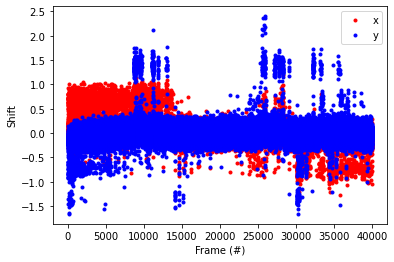

In [104]:
key = {'animal_id': 1571, 'session': 1, 'scan_idx': 1, 'pipeline_vesion': 1, 'field': 1}
x_shifts, y_shifts = (meso.MotionCorrection & key).fetch1('x_shifts', 'y_shifts')

pyplot.figure()
pyplot.plot(x_shifts, color='r', linestyle='None', marker='.', label='x')
pyplot.plot(y_shifts, color='b', linestyle='None', marker='.', label='y')
pyplot.legend()
pyplot.xlabel('Frame (#)')
pyplot.ylabel('Shift')

# Plot motion corrected and stitched image

In [17]:
# Load hdf5 file
stitched_filename = (meso.Stitch & experiment_id_query).fetch1('filename')
h5 = h5py.File(stitched_filename,'r')

In [18]:
# Fetch frames for one trial_idx
key = {'experiment_id': 1, 'trial_idx': 19}
start, stop = (odor.OdorAnalysis.CombinedTrial & key).fetch1('start','stop')
print(start,stop)
stitched_image = np.empty((h5['frame0'].shape[0],h5['frame0'].shape[1],stop-start))

for frame in range(start, stop):
    stitched_image[:,:,frame-start] = h5[f'frame{frame}']
h5.close()

754 820


In [53]:
# Fetch frames for all trial_idx for one odorant
key = {'odorant': 'Acetophenone_0.01'}
# key = {'odorant': 'Eucalyptol_0.01'}
start, stop = (odor.OdorAnalysis.CombinedTrial & key).fetch('start','stop')
frame_count = sum(stop-start) + len(start)
stitched_image = np.empty((h5['frame000'].shape[0], h5['frame000'].shape[1], frame_count))

frame_counter = 0
for i in range(len(start)):
    for frame in range(start[i], stop[i]+1):
        stitched_image[:,:,frame_counter] = h5[f'frame{frame:03d}']
        frame_counter += 1
h5.close()

In [23]:
plot_stitched_movie(image = stitched_image, 
                    fps = fps, 
                    vmin = -0.5, 
                    vmax = 0.25)

# Plot Gaussian filtered stitched image

In [20]:
stitched_image_filter = gaussian_filter(stitched_image, sigma=3)

In [22]:
plot_stitched_movie(image = stitched_image_filter, 
                    fps = fps, 
                    vmin = 1.1, 
                    vmax = 0.75)

# Plot average image for one trial_idx

In [50]:
# Fetch trial average image
key = {'experiment_id': 1, 'trial_idx': 19}
average_image=(odor.OdorAnalysis.SummaryImage & key).fetch1('average_image')

In [81]:
# Or calculate trial average image
stitched_filename = (meso.Stitch & experiment_id_query).fetch1('filename')
h5 = h5py.File(stitched_filename,'r')

key = {'experiment_id': 1, 'trial_idx': 19}
start, stop = (odor.OdorAnalysis.CombinedTrial & key).fetch1('start','stop')       
stitched_image = np.empty((h5['frame000'].shape[0], h5['frame000'].shape[1], stop-start))
for frame in range(start, stop):
    stitched_image[:,:,frame-start] = h5[f'frame{frame:03d}']
h5.close()

average_image = np.mean(stitched_image,axis=2)

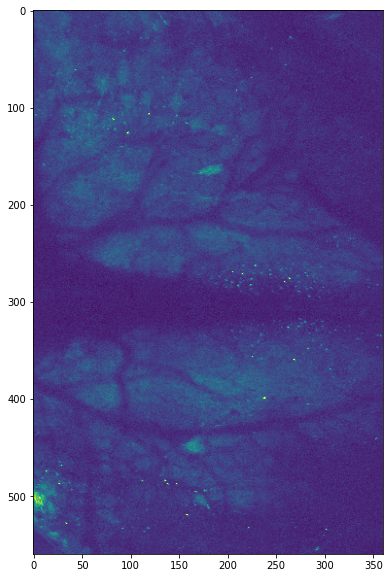

In [106]:
# Plot trial average image
pyplot.figure(figsize=(10,10))
pyplot.imshow(average_image, vmin=np.nanmin(average_image), vmax=np.nanmax(average_image)*.5, aspect="equal")
pyplot.show()

# Plot average image for all trial_idx for a given odorant over the entire scan

In [174]:
# Calculate odorant average image
stitched_filename = (meso.Stitch & experiment_id_query).fetch1('filename')
h5 = h5py.File(stitched_filename,'r')

key = {'odorant': 'Acetophenone_0.01'}
# key = {'odorant': 'Eucalyptol_0.01'}
start, stop = (odor.OdorAnalysis.CombinedTrial & key).fetch('start','stop')
frame_count = sum(stop-start) + len(start)
stitched_image = np.empty((h5['frame000'].shape[0], h5['frame000'].shape[1], frame_count))
frame_counter = 0
for i in range(len(start)):
    for frame in range(start[i], stop[i]+1):
        stitched_image[:,:,frame_counter] = h5[f'frame{frame:03d}']
        frame_counter += 1
h5.close()

average_image = np.mean(stitched_image,axis=2)

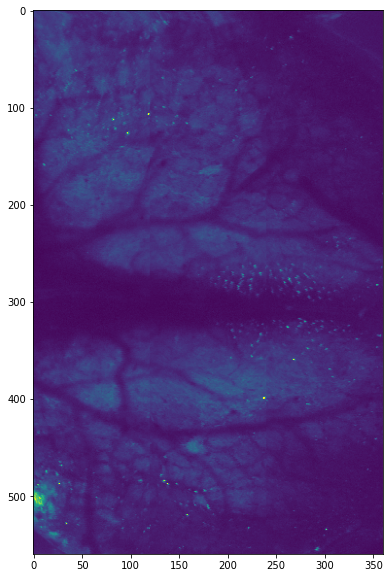

In [175]:
# Plot odorant average image
pyplot.figure(figsize=(10,10))
pyplot.imshow(average_image, vmin=np.nanmin(average_image), vmax=np.nanmax(average_image)*.5, aspect="equal")
pyplot.show()

# Plot manual segmentations on individual fields

In [6]:
plot_fields_movie(fields = fields_filter, 
                  fps = fps, 
                  vmin = 1.1, 
                  vmax = 0.85, 
                  masks = True, 
                  segmentation_method = 1, 
                  color = 'white')

# Plot CNMF segmentations on individual fields

In [7]:
plot_fields_movie(fields = fields_filter, 
                  fps = fps, 
                  vmin = 1.1, 
                  vmax = 0.85, 
                  masks = True, 
                  segmentation_method = 2, 
                  color = 'white')

# Plot manual segmenations on stitched image

In [8]:
plot_stitched_movie(image = stitched_image_filter, 
                    fps = fps, 
                    vmin = 1.1, 
                    vmax = 0.75, 
                    masks = True, 
                    segmentation_method = 1, 
                    threshold_fraction = 0.1)
# stitched_image
# vmin = -0.5, 
# vmax = 0.25, 
# width_min = 108.12
# width_max = 3108.12
# height_min = -1070.208
# height_max = 1729.792

# Plot CNMF segmentations on stitched image

In [9]:
plot_stitched_movie(image = stitched_image, 
                    fps = fps, 
                    vmin = -0.5, 
                    vmax = 0.25, 
                    masks = True, 
                    segmentation_method = 2, 
                    color = 'white', 
                    threshold_fraction = 0.1)

# Plot CNMF segmentations on average stitched image

In [249]:
# Calculate average image
stitched_filename = (meso.Stitch & experiment_id_query).fetch1('filename')
h5 = h5py.File(stitched_filename,'r')

start = 0
stop = 1000
stitched_image = np.empty((h5['frame000'].shape[0], h5['frame000'].shape[1], stop-start))

for frame in range(stop-start):
    stitched_image[:,:,frame] = h5[f'frame{frame:03d}']
h5.close()

average_image = np.mean(stitched_image, axis=2)
average_image = np.expand_dims(average_image, axis=2)

In [10]:
plot_stitched_movie(image = average_image, 
                    fps = fps, 
                    vmin = 1, 
                    vmax = 0.25, 
                    masks = True, 
                    segmentation_method = 2, 
                    color = 'white', 
                    threshold_fraction = 0.1)

# Plot odor response integrals

paths init  /data/odor_meso/paths.init
My location is work_1
id is  DataMan
Datajoint connection passes test


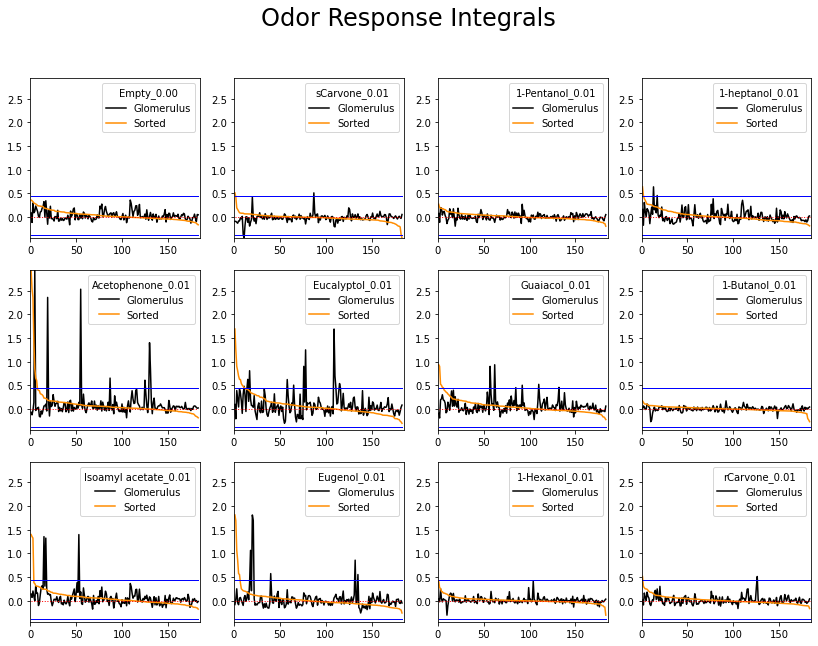

In [40]:
key = {'experiment_id':1}
data_plot(key)

# Plot all signficant masks

In [524]:
# Determine significant glomeruli for an odor based on integral response plot
key = {'experiment_id': 1}
plot_integral = (odor.OdorAnalysis.PlotIntegral & key).fetch1()
odor_index = 5
print('Odor: ', plot_integral['odor_labels'][odor_index])

mask_sig_f1 = []
mask_sig_f2 = []
mask_sig_f3 = []
mask_n_f1 = len(meso.Segmentation.Mask & 'field=1' & 'segmentation_method=1')
mask_n_f2 = len(meso.Segmentation.Mask & 'field=2' & 'segmentation_method=1')

for i in plot_integral['glomeruli']:
    if (plot_integral['response_integral'][odor_index-1][i-1] < plot_integral['neg_criterion']) or \
       (plot_integral['response_integral'][odor_index-1][i-1] > plot_integral['pos_criterion']):
        print(f'mask {i-1} \t signicant repsonse {plot_integral["response_integral"][odor_index-1][i-1]:.2f}')
        
        # Map glomeruli list back to individual fields
        if i <= mask_n_f1:
            mask_sig_f1.append(i-1)
        elif i > mask_n_f1 and i <= mask_n_f1 + mask_n_f2:
            mask_sig_f2.append(i-1-mask_n_f1)
        else:
            mask_sig_f3.append(i-1-mask_n_f1-mask_n_f2)

mask_sig = [mask_sig_f1, mask_sig_f2, mask_sig_f3]
print('Masks for each field', mask_sig)

Odor:  Acetophenone_0.01
mask 4 	 signicant repsonse 2.93
mask 18 	 signicant repsonse 2.35
mask 54 	 signicant repsonse 2.53
mask 86 	 signicant repsonse 0.65
mask 124 	 signicant repsonse 0.61
mask 129 	 signicant repsonse 1.40
mask 130 	 signicant repsonse 0.85
Masks for each field [[4, 18, 54], [6, 44, 49, 50], []]


In [378]:
# Fetch frames for all trial_idx for one odorant
key = {'experiment_id': 1, 'odorant': 'Acetophenone_0.01'}
start, stop = (odor.OdorAnalysis.CombinedTrial & key).fetch('start', 'stop')

channel = 1
scan_f0 = []
scan_f1 = []
scan_f2 = []
# frame_count = sum(stop-start) + len(start)

for i in range(len(start)):
    for frame in range(start[i], stop[i]+1):
        scan_f0.append(scan[0, :, :, channel - 1, frame])
        scan_f1.append(scan[1, :, :, channel - 1, frame])
        scan_f2.append(scan[2, :, :, channel - 1, frame])

scan_f0=np.array(scan_f0).transpose(1,2,0)
scan_f1=np.array(scan_f1).transpose(1,2,0)
scan_f2=np.array(scan_f2).transpose(1,2,0)

fields = [scan_f0, scan_f1, scan_f2]

In [11]:
plot_fields_movie(fields = fields, 
                  fps = fps, 
                  vmin = -1, 
                  vmax = 0.25, 
                  masks = True, 
                  segmentation_method = 1, 
                  color = 'white',
                  threshold_fraction=0.1,
                  mask_sig = mask_sig)

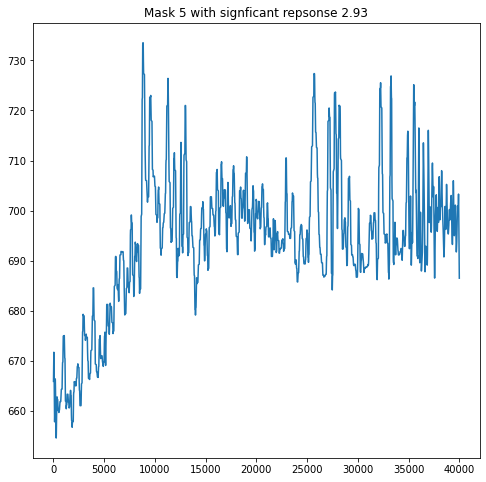

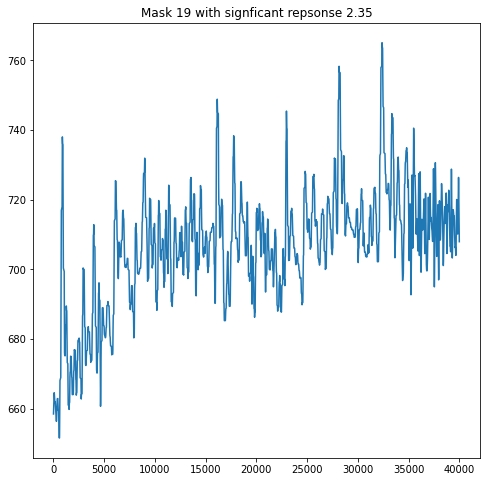

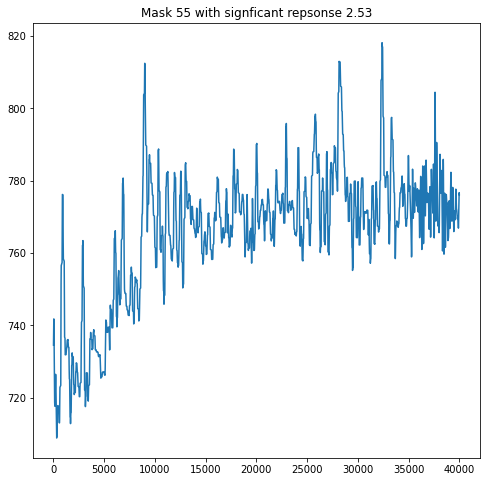

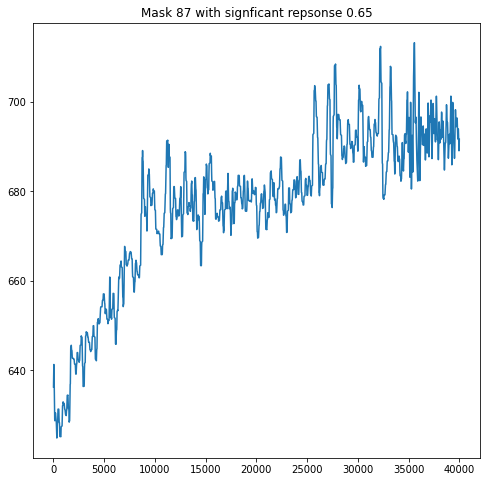

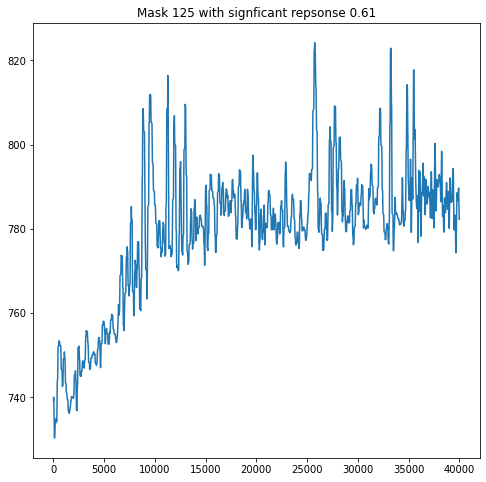

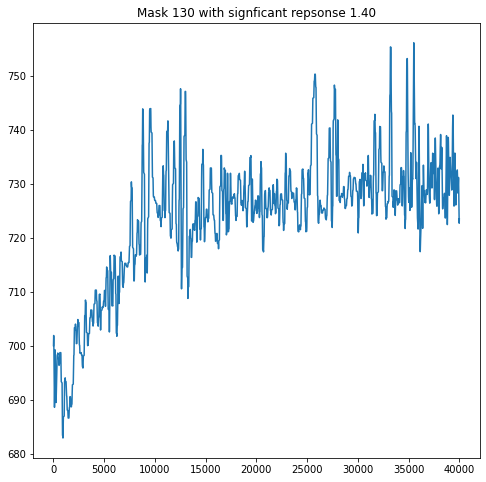

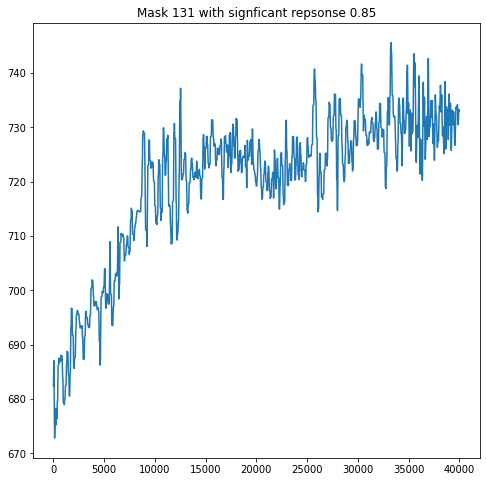

In [536]:
# Plot flourescence traces for significant masks
key = {'experiment_id': 1}
fluorescence = (odor.OdorAnalysis.Fluorescence & key).fetch1('f0s')

for i in plot_integral['glomeruli']:
    if (plot_integral['response_integral'][odor_index-1][i-1] < neg_criterion) or \
       (plot_integral['response_integral'][odor_index-1][i-1] > pos_criterion):
        pyplot.figure(figsize=(8,8))
        pyplot.plot(fluorescence['bkg_smooth'][:,i-1]) # bkg_smooth, constant_med
        pyplot.title(f'Mask {i} with signficant repsonse {plot_integral["response_integral"][odor_index-1][i-1]:.2f}')